In [1]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import tikzplotlib

In [2]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')


if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")
    prj_path= ""                      # put here the absolute path to the CreMA foder <<<<<<

In [3]:
os.chdir(prj_path)
!pwd

/home/rcabanas/work_java_crema/crema/CreMA


In [4]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"
img_folder = f"{exp_folder}/img/"

In [5]:
sys.path.append(exp_folder)
from utilplots import *

In [6]:
### Results with the chain where exogenous variables have 6 states
binResExo6 = {
    "markovian_ev" : f"{res_folder}/2020-05-10-18-28-51_chain_markovian_ev.csv",
    "nonmarkovian_ev": f"{res_folder}/2020-05-15-06-25-18_chain_nonmarkovian_ev.csv",
    "nonmarkovian_prec" : f"{res_folder}/2020-05-16-06-06-14_chain_nonmarkovian_prec.csv"
}

### Results with the HMM-like model
hmmRes = {
    "markovian_ev": f"{res_folder}/2020-05-13-04-01-42_hmm_markovian_ev.csv",
    "nonmarkovian_ev": f"{res_folder}/2020-05-13-22-47-34_hmm_nonmarkovian_ev.csv",
    "nonmarkovian_prec" : f"{res_folder}/2020-05-17-04-27-29_hmm_nonmarkovian_prec.csv"
}

### Results with the reverse HMM-like model
rhmmRes = {
    "markovian_ev": f"{res_folder}/2020-05-19-06-47-18_rhmm_markovian_ev.csv",
    "nonmarkovian_ev": f"{res_folder}/2020-05-19-01-12-33_rhmm_nonmarkovian_ev.csv",
    "nonmarkovian_prec": f"{res_folder}/2020-05-19-07-54-33_rhmm_nonmarkovian_prec.csv"
    
}


## Dictionary with the models to show
res = {
    "Chain 2-6":binResExo6,
    "HMM 2-6":hmmRes,
    "Reverse HMM 2-6":rhmmRes
}


# Time results

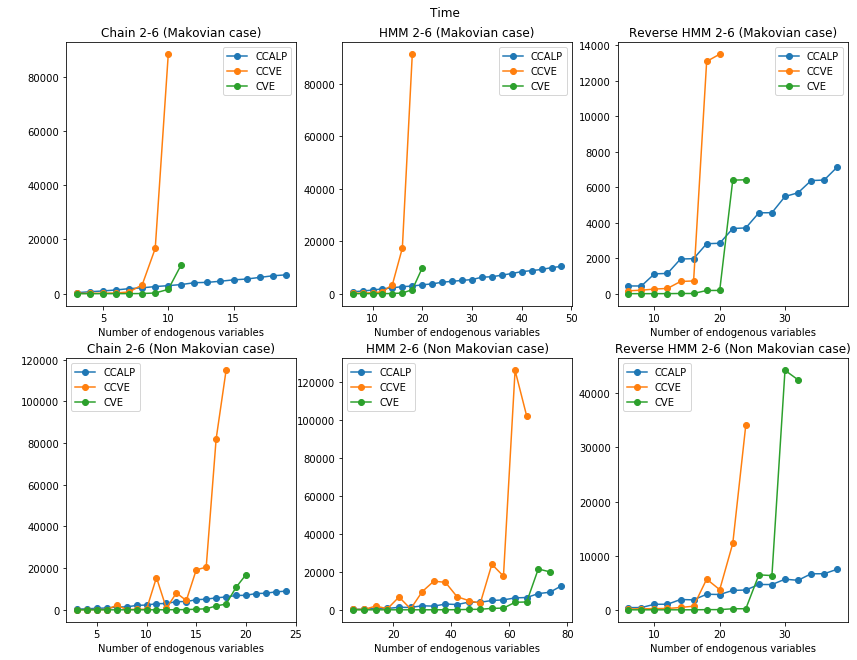

In [7]:
fig, axs = plt.subplots(2, len(list(res)), figsize=(14,10))

plot_func = plot_time
ylabel = "time (ms.)"
fig.suptitle("Time")
fig.subplots_adjust(top=0.93)
target = "target!=1"

def duplicate_N(data): 
    data["N"] = data["N"]*2; 
    return data
    


for k,v in res.items():
    
    i = list(res).index(k)
    
    T = [duplicate_N] if "HMM" in k else []

    plot_func(pd.read_csv(v["markovian_ev"]), 
              ax=axs[0,i],
              transformation=T,
              title=f"{k} (Makovian case)",
              xlabel="Number of endogenous variables", ylabel=" ")
    
    
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    plot_func(data, 
          ax=axs[1,i],
          transformation=T,
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=" ")

tikzplotlib.save(f"{img_folder}/time_results.tex")  

# Interval size results

/home/rcabanas/work_java_crema/crema/CreMA/papers/pgm20/experiments/utilplots.py:38: RuntimeWarning: Mean of empty slice
  for k in t.to_dict().keys() if "lowerbound" in k]), axis=1)


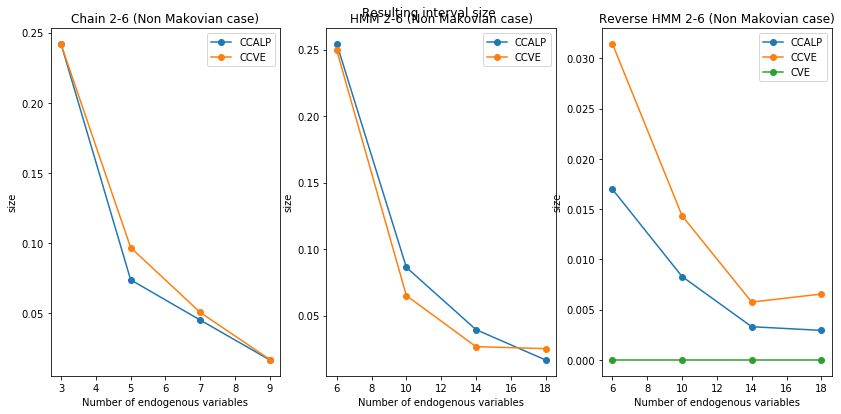

In [8]:
fig, axs = plt.subplots(1, len(list(res)), figsize=(14,6))

plot_func = plot_size
ylabel = "size"
fig.suptitle("Resulting interval size")
fig.subplots_adjust(top=0.93)
target = "target!=1"



for k,v in res.items():
    
    T = [duplicate_N] if "HMM" in k else []

    
    i = list(res).index(k)
    
    data = pd.read_csv(v["nonmarkovian_prec"])
    
    plot_func(data, 
          ax=axs[i], 
          transformation = T,
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

tikzplotlib.save(f"{img_folder}/size_results.tex")

# RMSE results

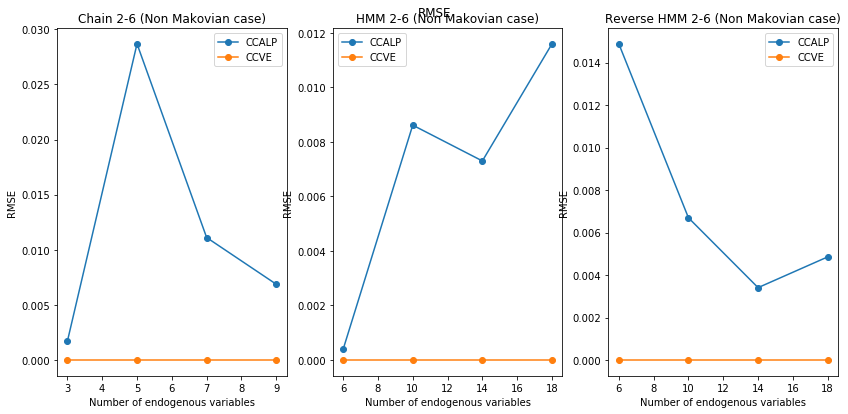

In [9]:
fig, axs = plt.subplots(1, len(list(res)), figsize=(14,6))

plot_func = plot_rmse
ylabel = "RMSE"
fig.suptitle("RMSE")
fig.subplots_adjust(top=0.93)

target = "target!=1"



for k,v in res.items():
    
    i = list(res).index(k)

    T = [duplicate_N] if "HMM" in k else []

    
    data = pd.read_csv(v["nonmarkovian_prec"])
    
    plot_func(data, 
          ax=axs[i], # [1,i]
          transformation = T,
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

tikzplotlib.save(f"{img_folder}/rmse_results.tex")

# Compact results

In [10]:
res_ = {
    "Chain":binResExo6,
    "Reverse HMM":rhmmRes
}

Text(0.5, 0.04, 'Number of exogenous variables')

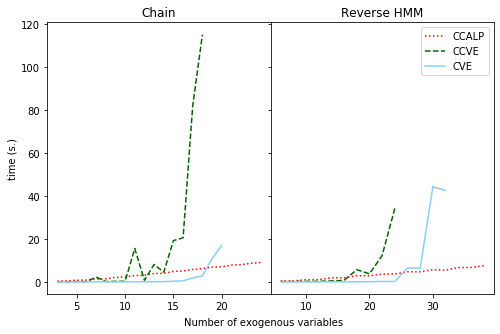

In [13]:
from pylab import rcParams
#rcParams['axes.xmargin'] = 0.05
rcParams['axes.ymargin'] = 0.05

fig, axs = plt.subplots(1, len(list(res_)), figsize=(8,5), sharey=True)

plot_func = plot_time
ylabel = "time (s.)"
#fig.suptitle("Time")
#fig.subplots_adjust(top=0.93)

def duplicate_N(data): 
    data["N"] = data["N"]*2; 
    return data

def to_seconds(data): 
    data["time"] = data["time"]/1000; 
    return data
    

for k,v in res_.items():
    
    i = list(res_).index(k)
    
    T = [duplicate_N] if "HMM" in k else []
    
    T.append(to_seconds)

    
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    plot_func(data, 
          ax=axs[i],
          transformation=T,
          title=f"{k}",
          xlabel=" ", ylabel=" ", legend=False)

    

    #axs[i].get_lines()[0].set_color("black")
    colors = ["red","darkgreen", "lightskyblue"]
    style = ["dotted", "dashed", "solid"]
    marker = ["","",""]
    #solid' | 'dashed', 'dashdot', 'dotted' 
    for k in range(0,3):
        axs[i].get_lines()[k].set_marker(marker[k])
        axs[i].get_lines()[k].set_linestyle(style[k])
        axs[i].get_lines()[k].set_color(colors[k])
        
    
    

plt.subplots_adjust(wspace=0, hspace=0)   
axs[0].xaxis.get_major_ticks()[-2].set_visible(False)  

axs[0].set_ylabel(ylabel)
#axs[1].legend(bbox_to_anchor=(0.2,1.0), framealpha=1)
axs[1].legend()

fig.text(0.5, 0.04, 'Number of exogenous variables', ha='center')



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

def plot(data, x_column, y_column, series_column, transformation=None, ax=None, 
         ylabel=None, xlabel=None, title=None, legend=True, linecolors = None):

    ax = ax or plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k').gca()

    data['method'] = data['method'].str.replace('eps','')
    
    if transformation is not None:
        for t in transformation:
            data = t(data)
    
    data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=[y_column])    
    series = np.unique(data[series_column].to_numpy())
    for s in series:       
            data_s = data.query(f"{series_column}=='{s}'")
            x = np.unique(data_s[x_column].to_numpy())
            y = data_s.groupby(x_column).mean().filter(items=[y_column]).to_numpy()

            ax.plot(x, y, marker='o', label=s)
            
            if legend: ax.legend()

    ax.set_ylabel(ylabel or y_column)
    ax.set_xlabel(xlabel or x_column)

    ax.set_title(title or "")
    
    return ax


### transformations ###
def compute_mean_size(data):
    dataout = data.copy()
    dataout[f"mean_size"] = data.apply(lambda t : np.nanmean([t[k.replace("lower","upper")] - t[k]  
                                                        for k in t.to_dict().keys() if "lowerbound" in k]), axis=1)
    return dataout


def get_rmse_bounds(data):

    joincolumns = [v for v in data.columns if "time" not in v and "bound" not in v and "method" not in v][1:]
    # add the corresponding exact result to each method
    df = pd.merge(
        data.query("method!='CVE'"),
        data.query("method=='CCVE'"),#.filter([v for v in data.columns if v not in ["method", "time", "query_time"]]),
        on = joincolumns,
    )
    def rmse_bounds(t):
        if np.isnan(t["lowerbound0_y"]):
            return float("nan")

        errlow = [math.pow(t[k.replace("_x","_y")]- t[k],2) for k in t.to_dict().keys() if "lowerbound" in k]
        errupp = [math.pow(t[k.replace("_x","_y")]- t[k],2) for k in t.to_dict().keys() if "upperbound" in k]
        return np.sqrt(np.nansum(errlow+errupp))

    dataout = data.copy()
    df["rmse"] = df.apply(rmse_bounds, axis=1)
    df = df.rename(columns={"method_x":"method"}).filter(joincolumns + ["method","rmse"])
    return pd.merge(dataout, df, on=joincolumns + ["method"], how="outer")


####

def plot_time(data, *args, **kwargs):
    return plot(data, "N", "time", "method", *args, **kwargs)

def plot_size(data, *args, **kwargs):
    T = [] if "transformation" not in kwargs else kwargs.pop("transformation")
    return plot(data, "N", "mean_size", "method", transformation = T + [compute_mean_size], *args, **kwargs)

def plot_rmse(data, *args, **kwargs):
    T = [] if "transformation" not in kwargs else kwargs.pop("transformation")
    return plot(data, "N", "rmse", "method", transformation = T + [get_rmse_bounds], *args, **kwargs)

